In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.discrete as ds
import numpy as np
import sympy as sp
from ipywidgets import interact, fixed
np.seterr(all='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
def exp1(a=0.5, envelope=True, zoom=False, causal=False):
    npts = 25 if zoom else 50
    s = ds.Exponential(a)
    if causal:
        s *= ds.Step()
    ns = np.arange(-5, npts+1)
    plt.figure(figsize=(20, 3))
    if envelope:
        ne = np.arange(-5-1, npts+1, 0.01)
        y = s.eval(ne, True)
        if y.dtype == np.complex_:
            y = np.real(y)
        plt.plot(ne, y, 'k')
    ys = s[ns]
    ml = plt.stem(ns, ys, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    plt.xlim([-5-0.5, npts+0.5])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    plt.yticks(size=14)
    plt.xticks(size=14)
    plt.title(str(s), size=18)

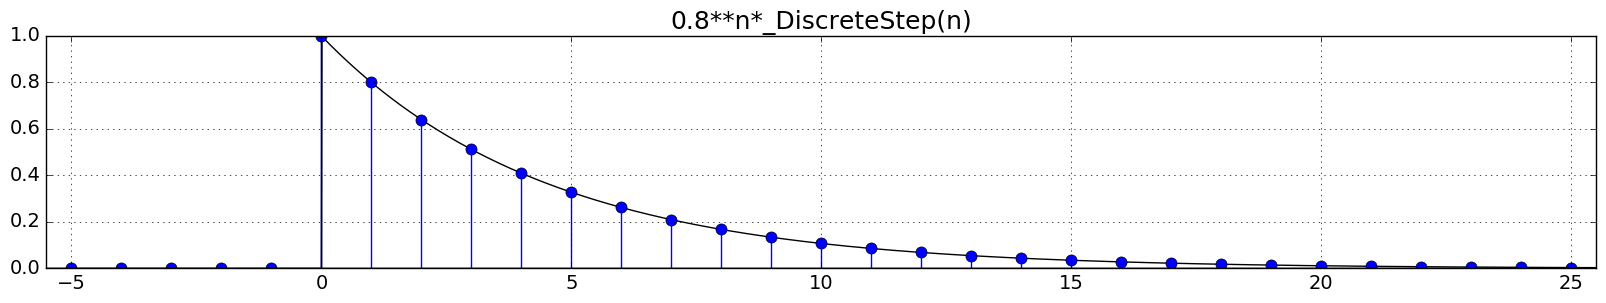

In [3]:
interact(exp1, a=(-2, 2, 0.05), envelope=True, zoom=False, causal=False);

In [4]:
def exp2(A0=1, a0=0.5, p0=True, A1=1, a1=0.5, p1=True, envelope=True, zoom=False):
    npts = 25 if zoom else 50
    s0 = A0*ds.Exponential(a0) * ds.Step()
    s1 = A1*ds.Exponential(a1) * ds.Step()
    s = s0 + s1
    ns = np.arange(-5, npts+1)
    plt.figure(figsize=(20, 4))
    if envelope:
        ne = np.arange(-5-1, npts+1, 0.01)
        y = s.eval(ne, True)
        if y.dtype == np.complex_:
            y = np.real(y)
        plt.plot(ne, y, 'k')
    if p0:
        plt.stem(ns, s0[ns], markerfmt='ro', linefmt='r-', basefmt='')
    if p1:
        plt.stem(ns, s1[ns], markerfmt='go', linefmt='g-', basefmt='')
    ys = s[ns]
    ml = plt.stem(ns, ys, markerfmt='bo', linefmt='b-', basefmt='k-')
    plt.setp(ml, ms=8)
    max_ = np.max(ys)
    min_ = np.min(ys)
    plt.xlim([-5-0.5, npts+0.5])
    # plt.axis([-5-0.5, npts+0.5, min([0, min_*(1.05)]), max_*(1.1)])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    plt.yticks(size=14)
    plt.xticks(size=14)
    plt.title(str(s), size=18)

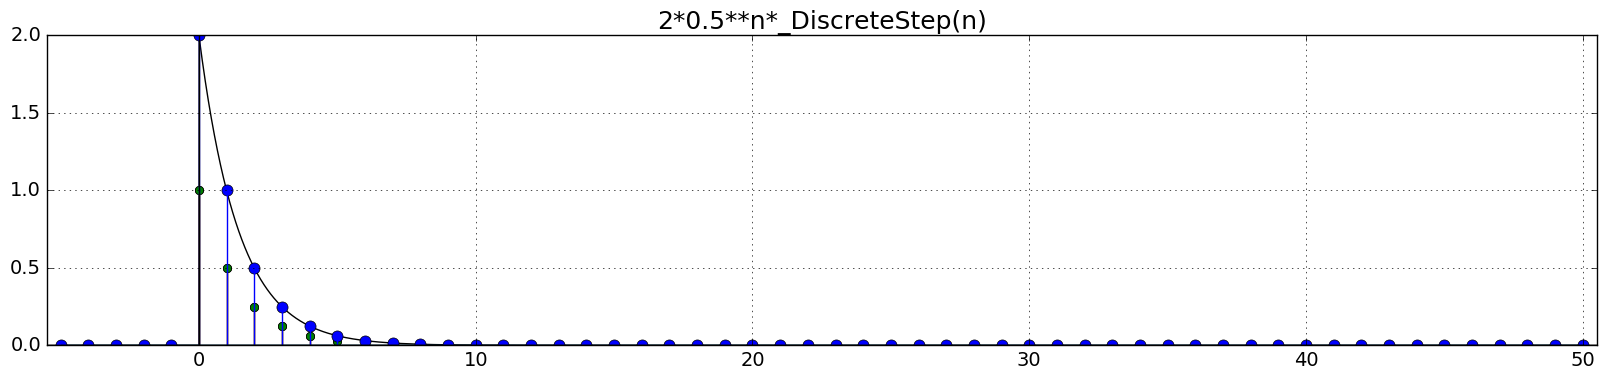

In [5]:
interact(exp2, A0=(-1, 1, 0.1), a0=(-1, 1, 0.01), p0=True, A1=(-1, 1, 0.1), a1=(-1, 1, 0.01), p1=True,
         envelope=True, zoom=False);

In [25]:
def exp3(ma=0.5, pa=0, real=True, imag=True, envelope=True, zoom=False):
    npts = 25 if zoom else 50
    s = ds.Exponential(ma*sp.exp(sp.I*sp.S.Pi*pa))
    ns = np.arange(0, npts+1)
    plt.figure(figsize=(20, 4))
    ys = s[ns]
    if envelope:
        ne = np.arange(-1, npts+1, 0.01)
        ye = s.eval(ne, True)
    if real:
        mlr = plt.stem(ns, np.real(ys), markerfmt='bo', linefmt='b-', basefmt='k-')
        plt.setp(mlr, ms=8)
    if imag:
        mli = plt.stem(ns, np.imag(ys), markerfmt='ro', linefmt='r-', basefmt='k-')
        plt.setp(mli, ms=8)
    if envelope:
        if real:
            plt.plot(ne, np.real(ye), 'b')
        if imag:
            plt.plot(ne, np.imag(ye), 'r')
    plt.xlim([-0.5, npts+0.5])
    plt.ylim([-1.1, 1.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    plt.yticks(size=14)
    plt.xticks(size=14)
    title = str(s)
    if s.is_periodic():
        title += ', N = {0}'.format(s.period)
    plt.title(title, size=18)

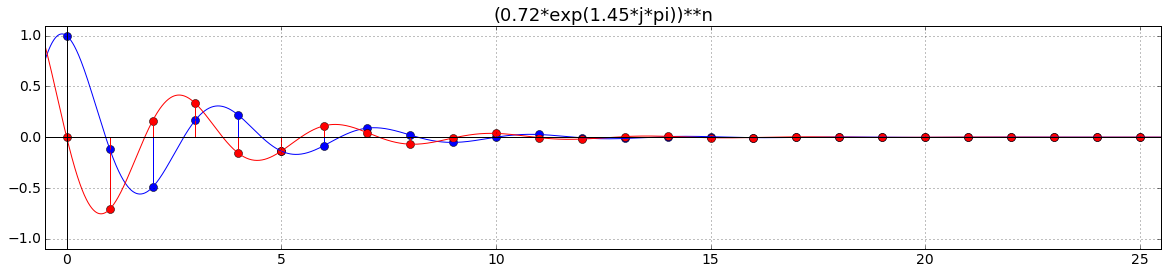

In [26]:
interact(exp3, ma=(0, 1.01, 0.01), pa=(0, 2, 0.05), real=True, imag=True, envelope=True, zoom=False);

In [27]:
def exp4(k=0, N=4, real=True, imag=True, envelope=True):
    npts = N
    s = ds.Exponential(sp.exp(sp.I*sp.S.Pi*2*k/N))
    ns = np.arange(0, npts)
    plt.figure(figsize=(20, 4))
    ys = s[ns]
    if envelope:
        ne = np.arange(-1, npts, 0.01)
        ye = s.eval(ne, True)
    if real:
        mlr = plt.stem(ns, np.real(ys), markerfmt='bo', linefmt='b-', basefmt='k-')
        plt.setp(mlr, ms=8)
    if imag:
        mli = plt.stem(ns, np.imag(ys), markerfmt='ro', linefmt='r-', basefmt='k-')
        plt.setp(mli, ms=8)
    if envelope:
        if real:
            plt.plot(ne, np.real(ye), 'b')
        if imag:
            plt.plot(ne, np.imag(ye), 'r')
    plt.xlim([-0.5, npts-0.5])
    plt.ylim([-1.1, 1.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.grid(True)
    plt.yticks(size=14)
    plt.xticks(size=14)
    plt.title(str(s), size=18)

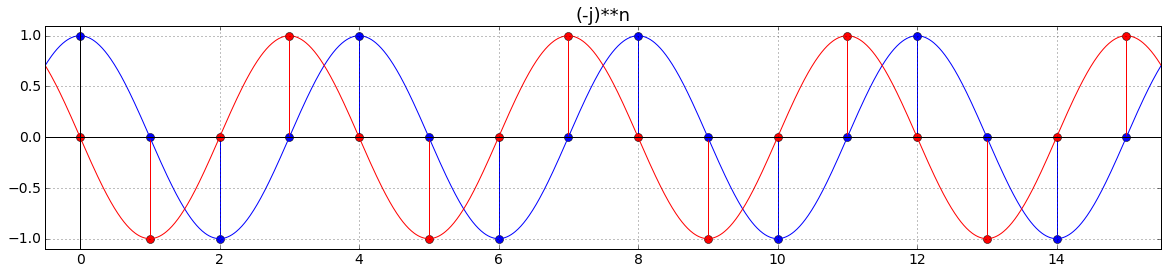

In [29]:
N = 16
interact(exp4, N=fixed(N), k=(0, N-1, 1), real=True, imag=True, envelope=True);